# 연습

# 이미지 가져오기

In [1]:
import os

dir_path = os.getenv('HOME') + '/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print(f"file_list : {file_list}")

file_list : ['reagan.jpg', 'clinton.jpeg', 'trump.jpg', 'biden.jpg', 'bush.jpeg', 'obama.jpg']


# 이미지 확인하기

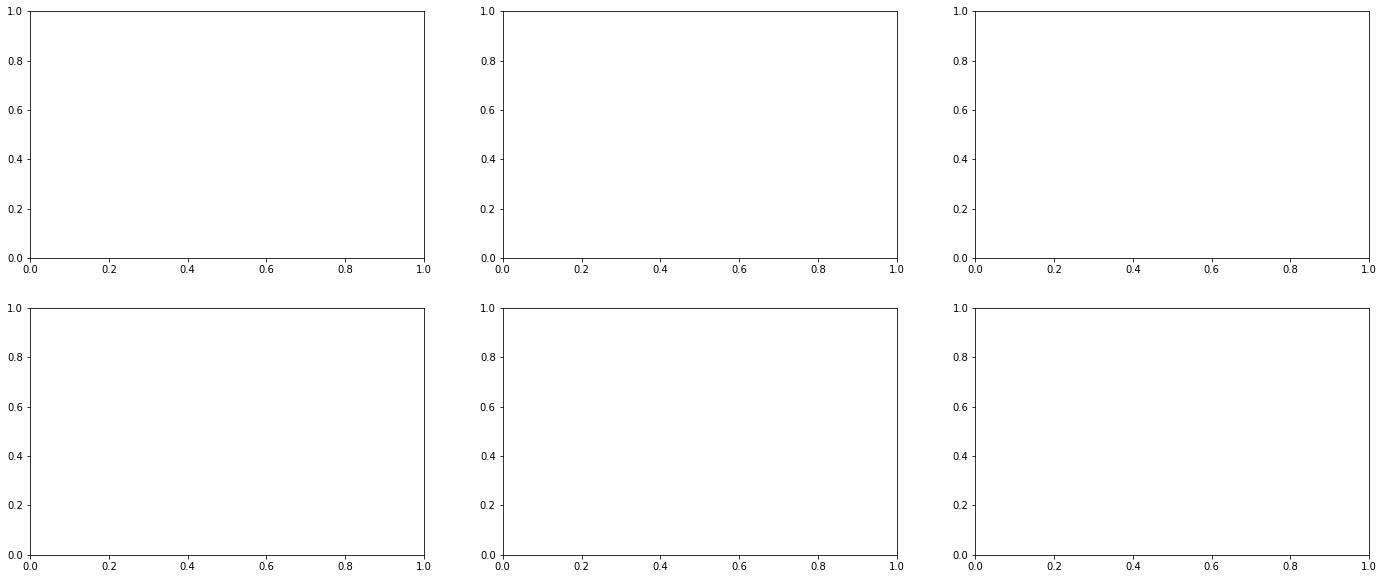

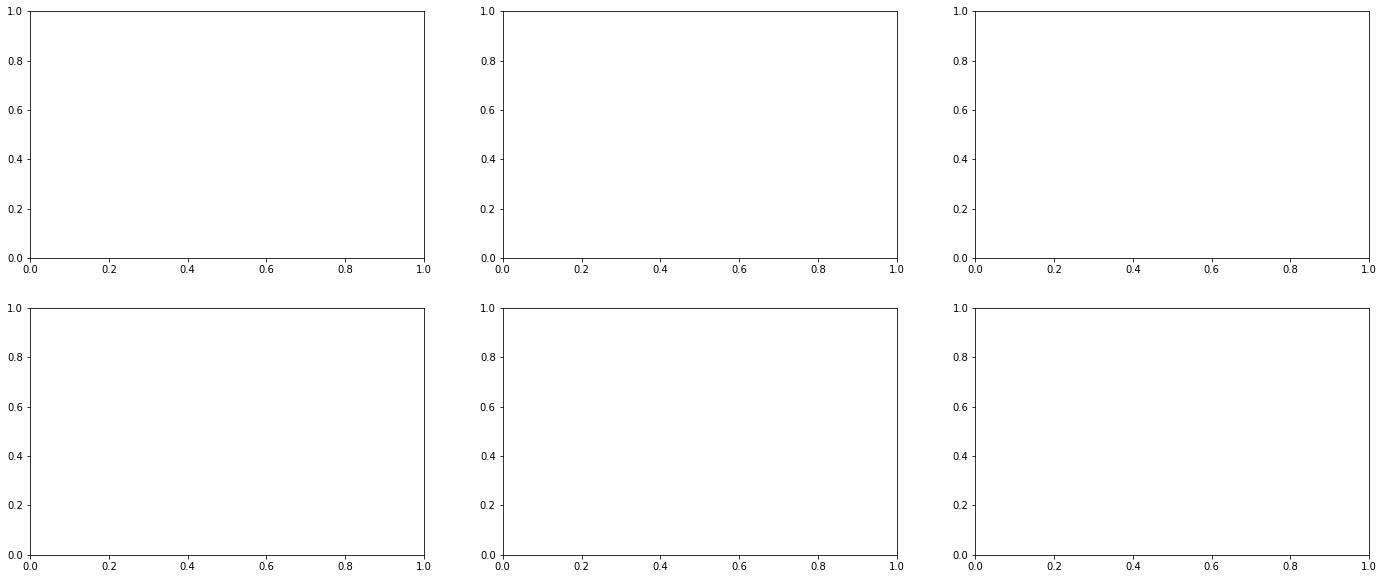

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

fig,axes = plt.subplots(nrows = 2, ncols = 3, figsize = (24, 10))

fig

# for i, ax in enumerate(axes.flatten()):
#     image = img.imread(dir_path + '/' + file_list[i])
#     ax.imshow(image)
# plt.show()

# fig.tight_layout()

# 얼굴 인식하기

In [5]:
import face_recognition
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations) # 이미지에서 얼굴 영역의 좌표를 출력

[(98, 758, 284, 572)]


98 758 284 572


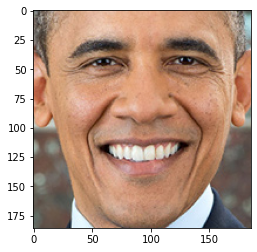

In [9]:
# 얼굴만 크롭한 이미지 만들기


a,b,c,d = face_locations[0]
print(a,b,c,d)

cropped_face = image[a:c, d:b, :]

plt.imshow(cropped_face)

In [10]:
# 얼굴인식 함수만들기
import face_recognition
import os

def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    a,b,c,d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

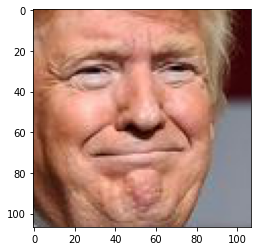

In [11]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

# 얼굴 영역의 임베딩 벡터 구하기

In [12]:

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print(f"file_list : {file_list}")


file_list : ['reagan.jpg', 'clinton.jpeg', 'trump.jpg', 'biden.jpg', 'bush.jpeg', 'obama.jpg']


In [53]:
image_file = os.path.join(dir_path, 'obama.jpg') # 이미지파일의 경로
face = get_cropped_face(image_file)

# 얼굴 영역을 통해 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding[0]

array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
       -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
        0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
        0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
        0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
       -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
       -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
       -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
       -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
        0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
        0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
       -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
        0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
        0.10299795, -0.12437531, -0.0490516 ,  0.12252682, -0.02

In [41]:
# 여러 사람의 얼굴 임베딩 벡터를 구해서 dict형태로 만드는 함수 구하기

# def get_face_embedding_dict(dir_path):
#     file_list = os.listdir(dir_path)
#     embedding_dict = {}
    
#     for file in file_list:
#         image_path = os.path.join(dir_path, file)
#         name = re.sub('\.[a-z]+', "", file)
#         face = get_cropped_face(image_file)
#         embedding = face_recognition.face_encodings(face)
        
#         if len(embedding) > 0:
#             embedding_dict[name] = embedding
        
#     return embedding_dict

In [32]:
# dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'

# file_list = os.listdir(dir_path)

# for file in file_list:
#     image_path = os.path.join(dir_path, file)
#     name = re.sub('\.[a-z]+', "", file)
#     print(name)

reagan
clinton
trump
biden
bush
obama


In [47]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [48]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

# 두 임베딩 벡터 간의 거리를 구하는 함수 구현하기

In [49]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord = 2)

get_distance('obama', 'trump')

0.8885117374787042

In [54]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [55]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
          0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
          0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
          0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
         -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
         -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
          0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
          0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
         -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
         -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
         -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
         -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
          0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
          0.05921567, -0.06

In [56]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [57]:
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.846720652777963)
순위 2 : 이름(bush), 거리(0.8639189288560225)
순위 3 : 이름(reagan), 거리(0.8692435806803928)
순위 4 : 이름(trump), 거리(0.8885117374787042)
순위 5 : 이름(clinton), 거리(0.9000994624487408)


# 미니 프로젝트

## 이미지 가져오기

In [93]:
import os

dir_path = os.getenv('HOME') + '/aiffel/face_embedding/people_image'
file_list = os.listdir(dir_path)

print(f"file_list : {file_list}")

file_list : ['kimjongkuk.jpg', 'ryeseungbum.jpeg', 'leejeongjae.jpeg', 'zoinsung.jpeg', 'me.jpg', 'kimyoonsuk.jpeg', 'kimsungkyun.jpeg', 'yoojaesuk.jpg', 'leekwangsoo.jpg', 'hwangjungmin.jpeg', 'me2.jpeg']


## 이미지 확인하기

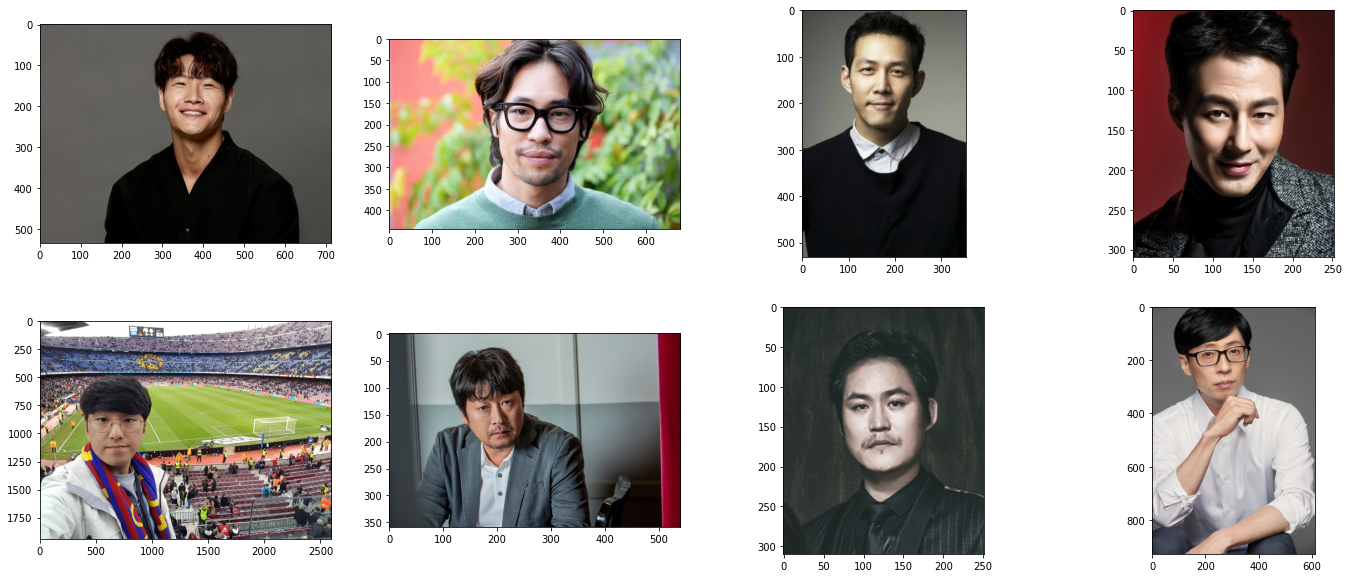

In [94]:
import matplotlib.pyplot as plt
import matplotlib.image as img

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24, 10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path + '/' + file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

## 얼굴 인식하기

In [95]:
import face_recognition
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/face_embedding/people_image/me.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations) # 이미지에서 얼굴 영역의 좌표를 출력

[(726, 972, 1281, 418)]


726 972 1281 418


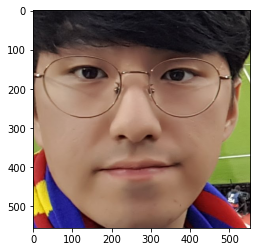

In [96]:
# 얼굴만 크롭한 이미지 만들기


a,b,c,d = face_locations[0]
print(a,b,c,d)

cropped_face = image[a:c, d:b, :]

plt.imshow(cropped_face)

In [98]:
# 얼굴인식 함수만들기
import face_recognition
import os

def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    a,b,c,d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

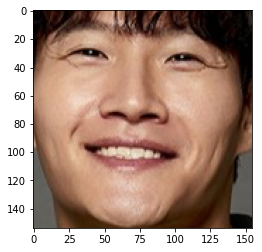

In [99]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/people_image/kimjongkuk.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [100]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/people_image'
file_list = os.listdir(dir_path)

print(f"file_list : {file_list}")

file_list : ['kimjongkuk.jpg', 'ryeseungbum.jpeg', 'leejeongjae.jpeg', 'zoinsung.jpeg', 'me.jpg', 'kimyoonsuk.jpeg', 'kimsungkyun.jpeg', 'yoojaesuk.jpg', 'leekwangsoo.jpg', 'hwangjungmin.jpeg', 'me2.jpeg']


In [101]:
image_file = os.path.join(dir_path, 'leekwangsoo.jpg') # 이미지파일의 경로
face = get_cropped_face(image_file)

# 얼굴 영역을 통해 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding[0]

array([-0.11287726,  0.11102791,  0.03534909, -0.03188171, -0.1041574 ,
        0.01054365, -0.09396531, -0.10768224,  0.13898188, -0.13786115,
        0.21534611, -0.03951092, -0.18901236, -0.04946341,  0.01570887,
        0.17311706, -0.20821401, -0.16089112, -0.05725851,  0.01212795,
        0.04291433, -0.03561081,  0.02013981,  0.04443906, -0.11467601,
       -0.29315433, -0.05820829, -0.03072159,  0.04448223, -0.04307735,
       -0.11202126, -0.02967907, -0.22032797, -0.05594519,  0.02064596,
        0.09033948, -0.01713426, -0.09191436,  0.222306  , -0.04183184,
       -0.23056582,  0.0555345 ,  0.02617738,  0.21079177,  0.2122128 ,
        0.04099311, -0.02443762, -0.15114963,  0.20730184, -0.17891219,
        0.06614771,  0.19874747,  0.07135702,  0.07130086, -0.00966841,
       -0.15764056,  0.00934689,  0.15975365, -0.07926366, -0.00452882,
        0.06919581,  0.01583315,  0.04430506, -0.18226708,  0.23385686,
        0.06668676, -0.11975818, -0.2212037 ,  0.08436283, -0.07

In [102]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [103]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['zoinsung']

array([-7.44357854e-02,  1.13641046e-01,  3.99745964e-02,  1.44379754e-02,
       -1.05082728e-01, -9.97589342e-03, -6.74664676e-02, -1.28352389e-01,
        5.38882762e-02, -8.80258828e-02,  1.98369026e-01, -7.23902434e-02,
       -1.84384242e-01, -1.87891256e-02, -8.06871653e-02,  9.67504382e-02,
       -1.88699231e-01, -1.27294123e-01, -3.18334699e-02, -7.02006519e-02,
        6.19717874e-02,  8.08004364e-02,  2.21431255e-02,  2.30948888e-02,
       -9.87302214e-02, -2.77745277e-01, -2.97581665e-02, -5.67529760e-02,
        6.14349917e-02, -4.08271812e-02, -5.07554933e-02,  4.32721451e-02,
       -1.98548228e-01, -4.17371690e-02,  4.70566861e-02,  1.02098517e-01,
       -1.98189523e-02, -1.10441735e-02,  1.90617815e-01, -3.33697312e-02,
       -1.89794391e-01,  6.57164752e-02,  5.38783595e-02,  3.09895515e-01,
        2.26055682e-01,  2.29814602e-03, -4.37530242e-02, -1.86379164e-01,
        8.22208151e-02, -1.49210468e-01,  7.59634227e-02,  2.16348067e-01,
        3.11333667e-02,  

In [104]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord = 2)

get_distance('me', 'me2')

0.4339510256390973

In [105]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('me')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [ ]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [108]:
def get_nearest_face(name, top=6):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [109]:
get_nearest_face('me')

순위 1 : 이름(me2), 거리(0.4339510256390973)
순위 2 : 이름(leekwangsoo), 거리(0.5574387862018997)
순위 3 : 이름(yoojaesuk), 거리(0.5822435426557016)
순위 4 : 이름(zoinsung), 거리(0.597197014952105)
순위 5 : 이름(kimjongkuk), 거리(0.6017728937654001)
순위 6 : 이름(ryeseungbum), 거리(0.6122282949900739)
